In [114]:
import Utils
import KNN
import DecisionTree

In [107]:
x, y = Utils.read_data()
x, y = Utils.shuffle_data(x, y)
x_train, x_test, y_train, y_test = Utils.split_data(x, y, 0.8)

In [108]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,54,1,0,120,188,0,1,113,0,1.4,1,1,3
1,66,0,0,178,228,1,1,165,1,1.0,1,2,3
2,38,1,2,138,175,0,1,173,0,0.0,2,4,2
3,59,1,3,134,204,0,1,162,0,0.8,2,2,2
4,63,1,0,130,330,1,0,132,1,1.8,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,67,0,2,115,564,0,0,160,0,1.6,1,0,3
239,56,0,0,200,288,1,0,133,1,4.0,0,2,3
240,65,0,2,155,269,0,1,148,0,0.8,2,0,2
241,59,1,0,135,234,0,1,161,0,0.5,1,0,3


In [15]:
descision_tree_accuracies_test = []
descision_tree_accuracies_train = []
prune_confidence_level = 0.95
for depth in range(1, 14):
    tree = DecisionTree.DecisionTree(depth, prune_confidence_level)
    tree.fit(x_train, y_train)
    print("\n------------")
    print("depth: " + str(depth))
    tree.debug_tree(tree.model) # print the tree
    print("train accuracy: " + str(Utils.get_accuracy(y_train, tree.predict(x_train))))
    descision_tree_accuracies_train.append(Utils.get_accuracy(y_train, tree.predict(x_train)))
    print("test accuracy: " + str(Utils.get_accuracy(y_test, tree.predict(x_test))))
    descision_tree_accuracies_test.append(Utils.get_accuracy(y_test, tree.predict(x_test)))


------------
depth: 1
[cp <= 0.000, score=-0.755798]
 [{'state': 'terminal', 'label': 0}]
 [{'state': 'terminal', 'label': 1}]
train accuracy: 0.7777777777777778
test accuracy: 0.6833333333333333

------------
depth: 2
[cp <= 0.000, score=-0.755798]
 [ca <= 0.000, score=-0.646814]
  [{'state': 'terminal', 'label': 1}]
  [{'state': 'terminal', 'label': 0}]
 [thal <= 2.000, score=-0.589059]
  [{'state': 'terminal', 'label': 1}]
  [{'state': 'terminal', 'label': 1}]
train accuracy: 0.7818930041152263
test accuracy: 0.7166666666666667

------------
depth: 3
[cp <= 0.000, score=-0.755798]
 [ca <= 0.000, score=-0.646814]
  [oldpeak <= 1.600, score=-0.745132]
   [{'state': 'terminal', 'label': 1}]
   [{'state': 'terminal', 'label': 0}]
  [trestbps <= 108.000, score=-0.247679]
   [{'state': 'terminal', 'label': 1}]
   [{'state': 'terminal', 'label': 0}]
 [thal <= 2.000, score=-0.589059]
  [age <= 55.000, score=-0.370068]
   [{'state': 'terminal', 'label': 1}]
   [{'state': 'terminal', 'label'


------------
depth: 9
[cp <= 0.000, score=-0.755798]
 [ca <= 0.000, score=-0.646814]
  [oldpeak <= 1.600, score=-0.745132]
   [thal <= 2.000, score=-0.783480]
    [age <= 58.000, score=-0.505090]
     [{'state': 'terminal', 'label': 1}]
     [exang <= 0.000, score=-0.612197]
      [chol <= 302.000, score=-0.601607]
       [thalach <= 71.000, score=0.000000]
        [{'state': 'terminal', 'label': 0}]
        [{'state': 'terminal', 'label': 1}]
       [{'state': 'terminal', 'label': 0}]
      [{'state': 'terminal', 'label': 0}]
    [chol <= 234.000, score=-0.423829]
     [age <= 41.000, score=0.000000]
      [{'state': 'terminal', 'label': 0}]
      [{'state': 'terminal', 'label': 1}]
     [{'state': 'terminal', 'label': 0}]
   [{'state': 'terminal', 'label': 0}]
  [trestbps <= 108.000, score=-0.247679]
   [trestbps <= 100.000, score=0.000000]
    [{'state': 'terminal', 'label': 0}]
    [{'state': 'terminal', 'label': 1}]
   [{'state': 'terminal', 'label': 0}]
 [thal <= 2.000, score=-0


------------
depth: 13
[cp <= 0.000, score=-0.755798]
 [ca <= 0.000, score=-0.646814]
  [oldpeak <= 1.600, score=-0.745132]
   [thal <= 2.000, score=-0.783480]
    [age <= 58.000, score=-0.505090]
     [{'state': 'terminal', 'label': 1}]
     [exang <= 0.000, score=-0.612197]
      [chol <= 302.000, score=-0.601607]
       [thalach <= 71.000, score=0.000000]
        [{'state': 'terminal', 'label': 0}]
        [{'state': 'terminal', 'label': 1}]
       [{'state': 'terminal', 'label': 0}]
      [{'state': 'terminal', 'label': 0}]
    [chol <= 234.000, score=-0.423829]
     [age <= 41.000, score=0.000000]
      [{'state': 'terminal', 'label': 0}]
      [{'state': 'terminal', 'label': 1}]
     [{'state': 'terminal', 'label': 0}]
   [{'state': 'terminal', 'label': 0}]
  [trestbps <= 108.000, score=-0.247679]
   [trestbps <= 100.000, score=0.000000]
    [{'state': 'terminal', 'label': 0}]
    [{'state': 'terminal', 'label': 1}]
   [{'state': 'terminal', 'label': 0}]
 [thal <= 2.000, score=-

In [16]:
descision_tree_accuracies_test

[0.6833333333333333,
 0.7166666666666667,
 0.65,
 0.7333333333333333,
 0.6833333333333333,
 0.7166666666666667,
 0.7166666666666667,
 0.7,
 0.7,
 0.7,
 0.7166666666666667,
 0.7166666666666667,
 0.7166666666666667]

In [17]:
descision_tree_accuracies_train

[0.7777777777777778,
 0.7818930041152263,
 0.8477366255144033,
 0.8724279835390947,
 0.9053497942386831,
 0.9423868312757202,
 0.9506172839506173,
 0.9711934156378601,
 0.9711934156378601,
 0.9794238683127572,
 0.9835390946502057,
 0.9835390946502057,
 0.9835390946502057]

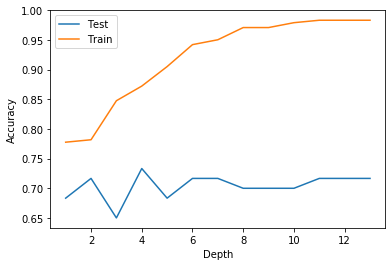

In [18]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1,1)
plt.plot(range(1, 14), descision_tree_accuracies_test, label="Test")
plt.plot(range(1, 14), descision_tree_accuracies_train, label="Train")
ax.legend()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

As illustrated in the above figure, by increasing the depth, hypothesis space becomes more and complex and probability of overfitting to train data increases. In low depth cases, model is to simple to learn. This figure also represents bias-varance trade-off.

As presented in the above figure, tree with 4 as depth is the best model according to test data. No we can't report this precision as we've kind of overfit to test data by tuning this hyperparameter(depth).

In [22]:
KNN_accuracies_test = []
KNN_accuracies_train = []
for k in range(1, 16):
    knn = KNN.KNN(k)
    knn.fit(x_train, y_train)
    print("\n------------")
    print("k: " + str(k))
    print("train accuracy: " + str(Utils.get_accuracy(y_train, knn.predict(x_train))))
    KNN_accuracies_train.append(Utils.get_accuracy(y_train, knn.predict(x_train)))
    print("test accuracy: " + str(Utils.get_accuracy(y_test, knn.predict(x_test))))
    KNN_accuracies_test.append(Utils.get_accuracy(y_test, knn.predict(x_test)))


------------
k: 1
train accuracy: 1.0
test accuracy: 0.7166666666666667

------------
k: 2
train accuracy: 0.9012345679012346
test accuracy: 0.75

------------
k: 3
train accuracy: 0.9012345679012346
test accuracy: 0.7166666666666667

------------
k: 4
train accuracy: 0.8888888888888888
test accuracy: 0.7666666666666667

------------
k: 5
train accuracy: 0.8930041152263375
test accuracy: 0.7833333333333333

------------
k: 6
train accuracy: 0.8806584362139918
test accuracy: 0.8166666666666667

------------
k: 7
train accuracy: 0.8683127572016461
test accuracy: 0.8166666666666667

------------
k: 8
train accuracy: 0.8641975308641975
test accuracy: 0.8166666666666667

------------
k: 9
train accuracy: 0.8641975308641975
test accuracy: 0.7666666666666667

------------
k: 10
train accuracy: 0.8600823045267489
test accuracy: 0.8

------------
k: 11
train accuracy: 0.8477366255144033
test accuracy: 0.8166666666666667

------------
k: 12
train accuracy: 0.8559670781893004
test accuracy: 0.81

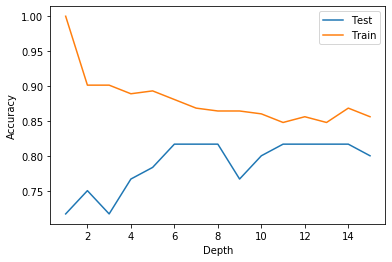

In [24]:
import matplotlib.pyplot as plt
ax = plt.subplot(1,1,1)
plt.plot(range(1, 16), KNN_accuracies_test, label="Test")
plt.plot(range(1, 16), KNN_accuracies_train, label="Train")
ax.legend()
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

As illustrated in the above figure, train accuracy is 1 for k = 1, which is a small sanity check for implementation. As illustrated in the above figure, by increasing the K, hypothesis space becomes more and complex and probability of overfitting to train data increases. In low depth cases, model is to simple to learn. This figure also represents bias-varance trade-off.

As presented in the above figure, KNN with 6 as K is the best model according to test data. No we can't report this precision as we've kind of overfit to test data by tuning this hyperparameter(k).

In [67]:
nfolds = 5
nrows = len(x_train)
fold_seperated_xs = []
fold_seperated_ys = []
for i in range(nfolds):
    start = round((nrows / nfolds) * i)
    end = round((nrows / nfolds) * (i + 1))
    fold_seperated_x = {"train":x_train.drop(x_train.index[start:end], inplace=False).reset_index(drop=True) ,"test":x_train[start:end].reset_index(drop=True)}
    fold_seperated_xs.append(fold_seperated_x)
    fold_seperated_y = {"train":y_train.drop(y_train.index[start:end], inplace=False).reset_index(drop=True) ,"test":y_train[start:end].reset_index(drop=True)}
    fold_seperated_ys.append(fold_seperated_y)    

In [68]:
fold_seperated_xs

[{'train':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  0     45    0   1       130   234    0        0      175      0      0.6   
  1     62    0   0       140   394    0        0      157      0      1.2   
  2     54    1   0       122   286    0        0      116      1      3.2   
  3     68    1   0       144   193    1        1      141      0      3.4   
  4     48    1   0       130   256    1        0      150      1      0.0   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  189   41    1   2       112   250    0        1      179      0      0.0   
  190   49    1   1       130   266    0        1      171      0      0.6   
  191   56    0   1       140   294    0        0      153      0      1.3   
  192   56    0   0       134   409    0        0      150      1      1.9   
  193   46    1   2       150   231    0        1      147      0      3.6   
  
       slope  ca  thal  
  0        1   0     2  
  

In [42]:
descision_tree_accuracies_test_cv = {}
prune_confidence_level = 0.95
for depth in range(1, 14):
    descision_tree_accuracies_test_cv[str(depth)] = []
    for cv_x, cv_y in zip(fold_seperated_xs, fold_seperated_ys):
        tree = DecisionTree.DecisionTree(depth, prune_confidence_level)
        tree.fit(cv_x['train'], cv_y['train'])
        descision_tree_accuracies_test_cv[str(depth)].append(Utils.get_accuracy(cv_y['test'], tree.predict(cv_x['test']))) 

In [43]:
descision_tree_accuracies_test_cv

{'1': [0.7346938775510204,
  0.75,
  0.7346938775510204,
  0.7291666666666666,
  0.7959183673469388],
 '2': [0.6938775510204082,
  0.75,
  0.7346938775510204,
  0.7291666666666666,
  0.7551020408163265],
 '3': [0.7755102040816326,
  0.7708333333333334,
  0.7959183673469388,
  0.7291666666666666,
  0.673469387755102],
 '4': [0.7755102040816326,
  0.7708333333333334,
  0.7959183673469388,
  0.7708333333333334,
  0.7346938775510204],
 '5': [0.7755102040816326,
  0.7916666666666666,
  0.8163265306122449,
  0.7083333333333334,
  0.7551020408163265],
 '6': [0.7551020408163265,
  0.7708333333333334,
  0.8163265306122449,
  0.7291666666666666,
  0.7346938775510204],
 '7': [0.7551020408163265,
  0.7916666666666666,
  0.8163265306122449,
  0.7083333333333334,
  0.7551020408163265],
 '8': [0.7551020408163265,
  0.7916666666666666,
  0.8163265306122449,
  0.7291666666666666,
  0.7142857142857143],
 '9': [0.7551020408163265,
  0.7916666666666666,
  0.8163265306122449,
  0.7291666666666666,
  0.7551

In [52]:
import numpy as np
descision_tree_mean_accuracies_test_cv = {str(i): np.mean(descision_tree_accuracies_test_cv[str(i)]) for i in range(1, 14)}
descision_tree_mean_accuracies_test_cv

{'1': 0.7488945578231292,
 '2': 0.7325680272108842,
 '3': 0.7489795918367348,
 '4': 0.7695578231292518,
 '5': 0.7693877551020408,
 '6': 0.7612244897959183,
 '7': 0.7653061224489797,
 '8': 0.7613095238095238,
 '9': 0.7694727891156463,
 '10': 0.7694727891156463,
 '11': 0.7694727891156463,
 '12': 0.7694727891156463,
 '13': 0.7694727891156463}

In the above cross-validation results, it's clear that depth equals to 9 drives the best result (due to generalization bounds simpler model is preferable).

In [72]:
KNN_accuracies_test_cv = {}
for k in range(1, 16):
    KNN_accuracies_test_cv[str(k)] = []
    for cv_x, cv_y in zip(fold_seperated_xs, fold_seperated_ys):
        knn = KNN.KNN(k)
        knn.fit(cv_x['train'], cv_y['train'])
        KNN_accuracies_test_cv[str(k)].append(Utils.get_accuracy(cv_y['test'], knn.predict(cv_x['test']))) 

In [73]:
KNN_accuracies_test_cv

{'1': [0.7346938775510204,
  0.8333333333333334,
  0.7346938775510204,
  0.6041666666666666,
  0.6938775510204082],
 '2': [0.7959183673469388,
  0.7083333333333334,
  0.7755102040816326,
  0.5833333333333334,
  0.673469387755102],
 '3': [0.7551020408163265, 0.875, 0.8571428571428571, 0.75, 0.673469387755102],
 '4': [0.7755102040816326,
  0.875,
  0.7959183673469388,
  0.6875,
  0.673469387755102],
 '5': [0.7755102040816326,
  0.8958333333333334,
  0.8163265306122449,
  0.6875,
  0.7142857142857143],
 '6': [0.7959183673469388,
  0.8541666666666666,
  0.8163265306122449,
  0.6875,
  0.6938775510204082],
 '7': [0.7959183673469388,
  0.9375,
  0.7959183673469388,
  0.7291666666666666,
  0.6938775510204082],
 '8': [0.8571428571428571,
  0.8958333333333334,
  0.7755102040816326,
  0.7083333333333334,
  0.6938775510204082],
 '9': [0.8163265306122449,
  0.9583333333333334,
  0.8163265306122449,
  0.7291666666666666,
  0.6530612244897959],
 '10': [0.8367346938775511,
  0.9375,
  0.7755102040816

In [74]:
KNN_mean_accuracies_test_cv = {str(i): np.mean(KNN_accuracies_test_cv[str(i)]) for i in range(1, 16)}
KNN_mean_accuracies_test_cv

{'1': 0.7201530612244897,
 '2': 0.707312925170068,
 '3': 0.7821428571428571,
 '4': 0.7614795918367346,
 '5': 0.7778911564625851,
 '6': 0.7695578231292517,
 '7': 0.7904761904761904,
 '8': 0.7861394557823129,
 '9': 0.7946428571428571,
 '10': 0.7987244897959184,
 '11': 0.8068877551020408,
 '12': 0.8068027210884354,
 '13': 0.8108843537414966,
 '14': 0.8149659863945578,
 '15': 0.8232993197278912}

In the above cross-validation results, it's clear that k equals to 15 drives the best result.

In [119]:
prune_confidence_level = 0.95
depth = 4
tree = DecisionTree.DecisionTree(depth, prune_confidence_level)
fit_results = tree.fit(x_train, y_train)

In [120]:
Utils.get_confusion_matrix(y_test, tree.predict(x_test))

{'TP': 33, 'FP': 8, 'TN': 14, 'FN': 5}

In [124]:
def get_classification_report(Y_test, Y_pred):
    metrics = Utils.get_evaluation_metrics(Y_test, Y_pred)
    report = {}
    report["Recall"] = metrics["TP"] / metrics["P"]
    report["Specificity"] = metrics["TN"] / metrics["N"]
    report["Precision"] = metrics["TP"] / (metrics["TP"] + metrics["FP"])
    report["F1 Score"] = 2 * metrics["TP"] / (2 * metrics["TP"] + metrics["FP"] + metrics["FN"])
    report["Accuracy"] = Utils.get_accuracy(Y_test, Y_pred)
    return report

get_classification_report(y_test, tree.predict(x_test))

{'Recall': 0.868421052631579,
 'Specificity': 0.6363636363636364,
 'Precision': 0.8048780487804879,
 'F1 Score': 0.8354430379746836,
 'Accuracy': 0.7833333333333333}

In [95]:
k = 4
knn = KNN.KNN(k)
fit_results = knn.fit(x_train, y_train)

In [86]:
Utils.get_confusion_matrix(y_test, knn.predict(x_test))

{'TP': 23, 'FP': 3, 'TN': 23, 'FN': 11}

In [125]:
get_classification_report(y_test, knn.predict(x_test))

{'Recall': 0.8157894736842105,
 'Specificity': 0.8636363636363636,
 'Precision': 0.9117647058823529,
 'F1 Score': 0.8611111111111112,
 'Accuracy': 0.8333333333333334}

In [129]:
prune_confidence_level = 0.95
depth = 13
tree = DecisionTree.DecisionTree(depth, prune_confidence_level)
tree.fit(x_train, y_train)
dist1 = tree.predict(x_test)
dist1

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    0
28    0
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    1
37    1
38    0
39    1
40    0
41    0
42    1
43    1
44    0
45    1
46    1
47    1
48    0
49    1
50    1
51    0
52    1
53    1
54    0
55    1
56    1
57    0
58    0
59    1
dtype: int64

In [130]:
tree.prune()
dist2 = tree.predict(x_test)
dist2

0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     0
8     0
9     1
10    1
11    1
12    1
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    0
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    0
29    1
30    1
31    1
32    1
33    0
34    1
35    1
36    1
37    1
38    1
39    1
40    0
41    0
42    1
43    1
44    0
45    1
46    1
47    1
48    0
49    1
50    1
51    0
52    1
53    1
54    0
55    1
56    1
57    0
58    0
59    1
dtype: int64

In [138]:
pVal = Utils.ttest(dist1, dist2)
print("Pvalue of ttest with having same distrubution as null hypothesis is " + str(pVal) + ".")
if pVal < 0.05:
    print("Null hypothesis is rejected! Significant differences exist!")
else:
    print("Unable to reject! There is no significant difference.")

Pvalue of ttest with having same distrubution as null hypothesis is 0.7123074696459737.
Unable to reject! There is no significant difference.


In the mentioned case, pruning did not help much as we test the chi pivotal with one degree of freedom. But still, it's helping avoiding overfitting.

In [139]:
dist2 = knn.predict(x_test)

In [140]:
pVal = Utils.ttest(dist1, dist2)
print("Pvalue of ttest with having same distrubution as null hypothesis is " + str(pVal) + ".")
if pVal < 0.05:
    print("Null hypothesis is rejected! Significant differences exist!")
else:
    print("Unable to reject! There is no significant difference.")

Pvalue of ttest with having same distrubution as null hypothesis is 0.3569748740516083.
Unable to reject! There is no significant difference.


Both of the models worked well as a result of using cross-validation, but they're significant fundamental differences between these two.